In [6]:
#필요한 모듈 선언

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

Task 1. (12 점) csv 파일을 다운로드 받고 pandas를 이용하여 불러오기<br>
● Task 1-1. (6 점) 데이터 불러오기<br>
● Task 1-2. (6 점) ‘date’ 열의 데이터를 날짜 타입으로 변경하기 (Hint! datetime, apply 등을 활용하거나 pandas의 to_datetime을 활용)

In [7]:
# Task 1
data=pd.read_csv("./owid-covid-data.csv")  #Task 1-1
data['date']=pd.to_datetime(data['date'])  #Task 1-2
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

Task 2. (32 점) (한국과 일본의 코로나 상황과 대응 차이는 어떨까?) 한국(South Korea)과 일본(Japan)의 코로나 상황 비교 시각화하기<br>
● Task 2-1. (8 점) 날짜별 확진자 비율 (total_cases_per_million) 시각화<br>
● Task 2-2. (8 점) 날짜별 신규 확진자 비율 (new_cases_per_million) 시각화<br>
● Task 2-3. (8 점) 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화<br>
● Task 2-4. (8 점) 날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred)
시각화

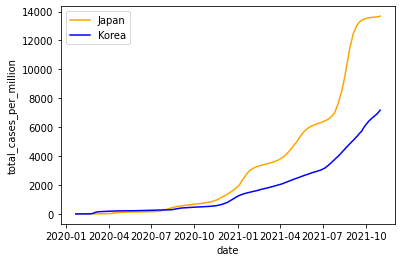

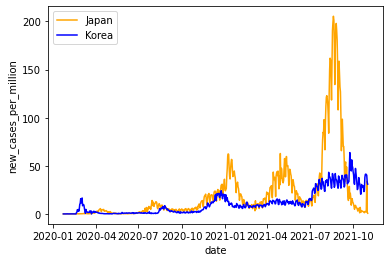

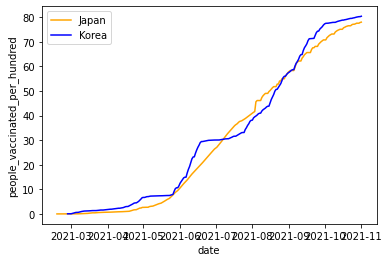

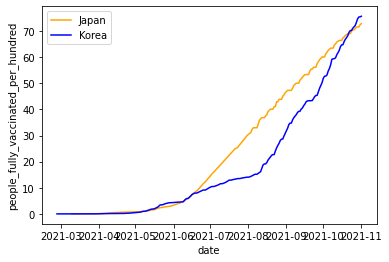

In [37]:
korea_data=data.loc[data['location']=="South Korea",:]
korea_data=korea_data[['location','date','total_cases_per_million','new_cases_per_million','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']]
korea_data.fillna(method='ffill',inplace=True)
japan_data=data.loc[data['location']=='Japan',:]
japan_data=japan_data[['location','date','total_cases_per_million','new_cases_per_million','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']]
japan_data.fillna(method='ffill',inplace=True)

# Task 2-1
plt.ylabel('total_cases_per_million')
plt.xlabel('date')
plt.plot(japan_data['date'],japan_data['total_cases_per_million'],c="orange",label="Japan")
plt.plot(korea_data['date'],korea_data['total_cases_per_million'],c="blue",label="Korea")
plt.legend()
plt.show()

# Task 2-2
plt.ylabel('new_cases_per_million')
plt.xlabel('date')
plt.plot(japan_data['date'],japan_data['new_cases_per_million'],c="orange",label="Japan")
plt.plot(korea_data['date'],korea_data['new_cases_per_million'],c="blue",label="Korea")
plt.legend()
plt.show()

# Task 2-3
plt.ylabel('people_vaccinated_per_hundred')
plt.xlabel('date')
plt.plot(japan_data['date'],japan_data['people_vaccinated_per_hundred'],c="orange",label="Japan")
plt.plot(korea_data['date'],korea_data['people_vaccinated_per_hundred'],c="blue",label="Korea")
plt.legend()
plt.show()

# Task 2-4
plt.ylabel('people_fully_vaccinated_per_hundred')
plt.xlabel('date')
plt.plot(japan_data['date'],japan_data['people_fully_vaccinated_per_hundred'],c="orange",label="Japan")
plt.plot(korea_data['date'],korea_data['people_fully_vaccinated_per_hundred'],c="blue",label="Korea")
plt.legend()
plt.show()

Task 3. (31 점) (백신 접종은 사망률을 낮출까?) 백신 접종률(people_vaccinated_per_hundred)과
확진자 비율 대비 사망자 비율(total_deaths_per_million/total_cases_per_million) 사이의
상관관계 알아보기<br>
● Task 3-1. (5 점) Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기<br>
○ location<br>
○ date<br>
○ total_deaths_per_million<br>
○ total_cases_per_million<br>
○ people_vaccinated_per_hundred<br>
○ human_development_index (Task 4에서 사용)<br>
● Task 3-2. (6 점) 각 국가별로 가장 최근 날짜의 데이터 추출하기 (Hint! pandas의 groupby와 max
활용)<br>
● Task 3-3. (10 점) 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot
그리기<br>
● Task 3-4. (10 점) 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson
Correlation Coefficient) 구하기 (함수 직접 구현)<br>

In [12]:
# Pearson Correlation Coefficient 함수 (Task 3-4)

def PCC(data,col1,col2):
  new_data=data.dropna(subset=[col1,col2])
  numpy_x=new_data[col1].to_numpy()
  numpy_y=new_data[col2].to_numpy()
  mean_x=np.mean(numpy_x)
  mean_y=np.mean(numpy_y)
  cov=np.mean((numpy_x-mean_x)*(numpy_y-mean_y))
  std_x=np.std(numpy_x)
  std_y=np.std(numpy_y)
  pcc=cov.sum()/(std_x*std_y)
  return pcc


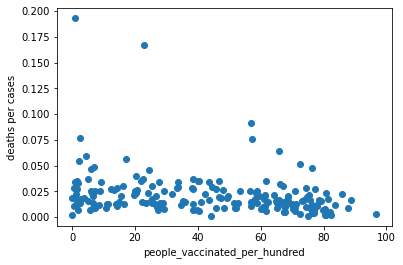

Person Correlation Coeffient: -0.2528239424290653 


In [13]:
#Task3

new_data=data[['location','date','total_deaths_per_million',\
               'total_cases_per_million','people_vaccinated_per_hundred'\
               ,'human_development_index']] #Task3-1

group_data=new_data.groupby('location').max() #Task3-2

#Task3-3
total_cases=group_data['total_cases_per_million'].tolist()
total_deaths=group_data['total_deaths_per_million'].tolist()
total_death_rate=[]
for epoch in range(len(total_deaths)):
  total_death_rate.append(total_deaths[epoch]/total_cases[epoch])
group_data['deaths per cases']=total_death_rate
plt.scatter(group_data['people_vaccinated_per_hundred'],group_data['deaths per cases'])
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('deaths per cases')
plt.show()

#Task 3-4
pcc=PCC(group_data,'people_vaccinated_per_hundred','deaths per cases') 
print("Person Correlation Coeffient: {:0.16f} ".format(pcc))

Task 4. (25 점) (백신 접종은 전세계적으로 골고루 이뤄지고 있을까?) HDI 계수
(human_development_index)와 백신 접종률(people_vaccinated_per_hundred) 사이의 상관관계
알아보기 (Task 3-2 에서 구한 데이터프레임 활용)<br>
● Task 4-1. (5 점) Task 3-2에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의
상관계수 (Pearson Correlation Coefficient) 구하기<br> (Task 3-4에서 구현한 함수 사용 혹은 기타
다른 방법 활용 가능)<br>
● Task 4-2. (10점) Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계
학습하기<br> (y = wx + b 에서 w값과 b값 구하기)<br>
● Task 4-3. (10점) HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서
학습한 직선을 겹쳐 그리기<br> (scatter plot과 직선이 일치하는지 확인하여 학습이 제대로 되었는지
확인)<br>

In [47]:
# dataframe to matrix function

def dataframe_to_mat(values):
  matrix=[[value] for value in values]
  return matrix


Person Correlation Coeffient: 0.8176363667248818 
w: 149.8485, b: -66.1057


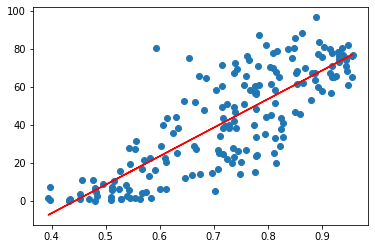

In [48]:
# Task 4-1
col1='human_development_index'
col2='people_vaccinated_per_hundred'

pcc=PCC(group_data,col1,col2) 
print("Person Correlation Coeffient: {:0.16f} ".format(pcc))

# Task 4-2
fourth_data=group_data.dropna(subset=[col1,col2])
x_data=fourth_data[col1]
y_data=fourth_data[col2]

x_train=torch.FloatTensor(dataframe_to_mat(x_data.values))
y_train=torch.FloatTensor(dataframe_to_mat(y_data.values))

w=torch.zeros(1,1)
b=torch.zeros(1,1)
lr=0.01

for epoch in range(30001):
  w.requires_grad_(True)
  b.requires_grad_(True)
  hp=torch.mm(x_train,w)+b
  cost=torch.mean((hp-y_train)**2)
  cost.backward()

  with torch.no_grad() as grd:
    w=w-lr*w.grad
    b=b-lr*b.grad

  #if epoch%100==0:
  #  print("epoch: {},cost: {:.6f},w: {}, b: {}".format(epoch,cost.item(),w.squeeze(),b.sum()))
print("w: {:.4f}, b: {:.4f}".format(w.squeeze(),b.squeeze()))


# Task 4-3
plt.scatter(x_data,y_data)
slope, y = np.polyfit(x_data.to_numpy(),y_data.to_numpy(), 1)

# 직선 그리기 
plt.plot(x_data.to_numpy(), slope*(x_data.to_numpy()) + y,c="red")
plt.show()